In [2]:
library(rstan)
library(reshape)
library(ggplot2)
library(ggforce) 
library(gridExtra)
library(PlaneGeometry)
library(cowplot)
library(MASS)
library(dplyr)
library(ggpubr)
library(ggthemes)

In [3]:
lynx_hare_df <-
  read.csv("hudson-bay-lynx-hare.csv",
           comment.char="#")

In [4]:
dimension <- 8

N <- length(lynx_hare_df$Year) - 1
ts <- 1:N
y_init <- c(lynx_hare_df$Hare[1], lynx_hare_df$Lynx[1])
y <- as.matrix(lynx_hare_df[2:(N + 1), 2:3])
y <- cbind(y[ , 2], y[ , 1]); # hare, lynx order
lynx_hare_data <- list(N = N, ts = ts, y_init = y_init, y = y)

## Sample Posterior

In [5]:
model_final <- stan_model("lotka-volterra.stan")

We set the initialisaion as the mode of the prior:

In [6]:
init_func <- function(chain_id=1){
    list(thet=log(c(0.7,0.02,0.7,0.02)), z_ini=log(c(10,10)), sigm=log(c(0.25,0.25)))
}

In [7]:
fit_final <- sampling(model_final, data = lynx_hare_data, init=init_func, iter = 4000, chains=4)


SAMPLING FOR MODEL 'lotka-volterra_sst' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000255 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 2.55 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 8.24349 seconds (Warm-up)
Chain 1:                9.82111 seconds (Sampling)
Chain 1:       

Computing MAP and Hessian:

In [46]:
optimal <- optimizing(model_final, data=lynx_hare_data, hessian=TRUE, init=init_func, seed=123, algorithm='LBFGS')
optimum_vec <- optimal$par[1:dimension]
hessian_matrix <- optimal$hessian

write.csv(optimum_vec, "optimal.csv")
write.csv(hessian_matrix, "hessian.csv")
optimal

$par
      thet[1]       thet[2]       thet[3]       thet[4]      z_ini[1] 
  -0.60290946   -3.61484866   -0.24348046   -3.76536426    3.55104799 
     z_ini[2]       sigm[1]       sigm[2]      theta[1]      theta[2] 
   1.81386222   -1.38836796   -1.38919013    0.54721721    0.02692100 
     theta[3]      theta[4]     z_init[1]     z_init[2]      sigma[1] 
   0.78389479    0.02315917   34.84982047    6.13409298    0.24948214 
     sigma[2]        z[1,1]        z[2,1]        z[3,1]        z[4,1] 
   0.24927710   50.46469052   66.96617412   66.19486597   38.47555907 
       z[5,1]        z[6,1]        z[7,1]        z[8,1]        z[9,1] 
  19.38158665   13.47763467   13.10612728   15.84501563   21.62769144 
      z[10,1]       z[11,1]       z[12,1]       z[13,1]       z[14,1] 
  31.27007829   45.61625229   62.87951871   69.77614523   46.94642070 
      z[15,1]       z[16,1]       z[17,1]       z[18,1]       z[19,1] 
  23.00715719   14.37571522   12.85423782   14.77793064   19.63847463 
      z[20,1]        z[1,2]        z[2,2]        z[3,2]        z[4,2] 
  28.07820299    7.46043159   13.38933332   30.34938162   47.50333802 
       z[5,2]        z[6,2]        z[7,2]        z[8,2]        z[9,2] 
  40.93950557   26.91980195   16.60608272   10.54507620    7.38201383 
      z[10,2]       z[11,2]       z[12,2]       z[13,2]       z[14,2] 
   6.16682398    6.79598533   10.90756958   24.21114578   44.83647155 
      z[15,2]       z[16,2]       z[17,2]       z[18,2]       z[19,2] 
  44.51996905   30.69183445   19.04863092   11.91166033    8.05284591 
      z[20,2] y_init_rep[1] y_init_rep[2]    y_rep[1,1]    y_rep[2,1] 
   6.33942020   21.45462888    4.20497135   89.07083104   79.82732934 
   y_rep[3,1]    y_rep[4,1]    y_rep[5,1]    y_rep[6,1]    y_rep[7,1] 
  71.65994366   36.34557116   18.47227971   14.60770750   22.80270006 
   y_rep[8,1]    y_rep[9,1]   y_rep[10,1]   y_rep[11,1]   y_rep[12,1] 
  15.61524922   22.21476309   30.26123272   44.22472457   94.33468939 
  y_rep[13,1]   y_rep[14,1]   y_rep[15,1]   y_rep[16,1]   y_rep[17,1] 
  69.32935919   52.14987805   23.60509454   13.13306368   18.75721123 
  y_rep[18,1]   y_rep[19,1]   y_rep[20,1]    y_rep[1,2]    y_rep[2,2] 
  18.58988383   25.14235488   22.84197377   10.62603158    9.80613165 
   y_rep[3,2]    y_rep[4,2]    y_rep[5,2]    y_rep[6,2]    y_rep[7,2] 
  22.63187914   40.52057151   34.77071134   23.03231735   19.97640797 
   y_rep[8,2]    y_rep[9,2]   y_rep[10,2]   y_rep[11,2]   y_rep[12,2] 
   8.93710118    6.01246816    5.46317978    8.97152195    7.61087100 
  y_rep[13,2]   y_rep[14,2]   y_rep[15,2]   y_rep[16,2]   y_rep[17,2] 
  24.08620920   61.05039981   49.97984605   25.70044702   21.24075449 
  y_rep[18,2]   y_rep[19,2]   y_rep[20,2] 
   8.47675765    4.39991918    4.57781504 

$value
[1] 44.77279

$return_code
[1] 0

$hessian
             thet.1      thet.2      thet.3       thet.4      z_ini.1
thet.1  -2925.54605 -123.154826 -1571.10933 -1400.756167 -1283.938290
thet.2   -123.15483 -424.216362  -601.66390   -87.902154  -173.378332
thet.3  -1571.10933 -601.663898 -2341.58384  -217.833883  -642.392249
thet.4  -1400.75617  -87.902154  -217.83388 -1164.321639  -817.568016
z_ini.1 -1283.93829 -173.378332  -642.39225  -817.568016  -804.255521
z_ini.2  -218.80843 -168.764209  -439.47019   -81.053873  -166.531045
sigm.1     13.18016    5.075442    14.21724     4.679461     5.447231
sigm.2    -13.79941  -13.681767   -16.84239    -9.934160    -9.933870
            z_ini.2       sigm.1       sigm.2
thet.1  -218.808426    13.180161   -13.799408
thet.2  -168.764209     5.075442   -13.681767
thet.3  -439.470195    14.217235   -16.842390
thet.4   -81.053873     4.679461    -9.934160
z_ini.1 -166.531045     5.447231    -9.933870
z_ini.2 -247.281995     5.075477    -6.106666
sigm.1     5.075477 -2531.635807     0.000000
sigm.2    -6.106666     0.000000 -2527.527761

$theta_tilde
        thet[1]   thet[2]    thet[3]   thet[4] z_ini[1] z_ini[2]   sigm[1]
[1,] -0.6029095 -3.614849 -

In [52]:
optimal <- optimizing(model_final, data=lynx_hare_data, hessian=TRUE, init=init_func, seed=123, algorithm='LBFGS', iter=48)
optimum_vec = optimal$par[1:dimension]
hessian_matrix = optimal$hessian

write.csv(optimum_vec, "optimal.csv")
write.csv(hessian_matrix, "hessian.csv")
optimal

$par
      thet[1]       thet[2]       thet[3]       thet[4]      z_ini[1] 
  -0.60290946   -3.61484866   -0.24348046   -3.76536426    3.55104799 
     z_ini[2]       sigm[1]       sigm[2]      theta[1]      theta[2] 
   1.81386222   -1.38836796   -1.38919013    0.54721721    0.02692100 
     theta[3]      theta[4]     z_init[1]     z_init[2]      sigma[1] 
   0.78389479    0.02315917   34.84982047    6.13409298    0.24948214 
     sigma[2]        z[1,1]        z[2,1]        z[3,1]        z[4,1] 
   0.24927710   50.46469052   66.96617412   66.19486597   38.47555907 
       z[5,1]        z[6,1]        z[7,1]        z[8,1]        z[9,1] 
  19.38158665   13.47763467   13.10612728   15.84501563   21.62769144 
      z[10,1]       z[11,1]       z[12,1]       z[13,1]       z[14,1] 
  31.27007829   45.61625229   62.87951871   69.77614523   46.94642070 
      z[15,1]       z[16,1]       z[17,1]       z[18,1]       z[19,1] 
  23.00715719   14.37571522   12.85423782   14.77793064   19.63847463 
      z[20,1]        z[1,2]        z[2,2]        z[3,2]        z[4,2] 
  28.07820299    7.46043159   13.38933332   30.34938162   47.50333802 
       z[5,2]        z[6,2]        z[7,2]        z[8,2]        z[9,2] 
  40.93950557   26.91980195   16.60608272   10.54507620    7.38201383 
      z[10,2]       z[11,2]       z[12,2]       z[13,2]       z[14,2] 
   6.16682398    6.79598533   10.90756958   24.21114578   44.83647155 
      z[15,2]       z[16,2]       z[17,2]       z[18,2]       z[19,2] 
  44.51996905   30.69183445   19.04863092   11.91166033    8.05284591 
      z[20,2] y_init_rep[1] y_init_rep[2]    y_rep[1,1]    y_rep[2,1] 
   6.33942020   21.45462888    4.20497135   89.07083104   79.82732934 
   y_rep[3,1]    y_rep[4,1]    y_rep[5,1]    y_rep[6,1]    y_rep[7,1] 
  71.65994366   36.34557116   18.47227971   14.60770750   22.80270006 
   y_rep[8,1]    y_rep[9,1]   y_rep[10,1]   y_rep[11,1]   y_rep[12,1] 
  15.61524922   22.21476309   30.26123272   44.22472457   94.33468939 
  y_rep[13,1]   y_rep[14,1]   y_rep[15,1]   y_rep[16,1]   y_rep[17,1] 
  69.32935919   52.14987805   23.60509454   13.13306368   18.75721123 
  y_rep[18,1]   y_rep[19,1]   y_rep[20,1]    y_rep[1,2]    y_rep[2,2] 
  18.58988383   25.14235488   22.84197377   10.62603158    9.80613165 
   y_rep[3,2]    y_rep[4,2]    y_rep[5,2]    y_rep[6,2]    y_rep[7,2] 
  22.63187914   40.52057151   34.77071134   23.03231735   19.97640797 
   y_rep[8,2]    y_rep[9,2]   y_rep[10,2]   y_rep[11,2]   y_rep[12,2] 
   8.93710118    6.01246816    5.46317978    8.97152195    7.61087100 
  y_rep[13,2]   y_rep[14,2]   y_rep[15,2]   y_rep[16,2]   y_rep[17,2] 
  24.08620920   61.05039981   49.97984605   25.70044702   21.24075449 
  y_rep[18,2]   y_rep[19,2]   y_rep[20,2] 
   8.47675765    4.39991918    4.57781504 

$value
[1] 44.77279

$return_code
[1] 0

$hessian
             thet.1      thet.2      thet.3       thet.4      z_ini.1
thet.1  -2925.54605 -123.154826 -1571.10933 -1400.756167 -1283.938290
thet.2   -123.15483 -424.216362  -601.66390   -87.902154  -173.378332
thet.3  -1571.10933 -601.663898 -2341.58384  -217.833883  -642.392249
thet.4  -1400.75617  -87.902154  -217.83388 -1164.321639  -817.568016
z_ini.1 -1283.93829 -173.378332  -642.39225  -817.568016  -804.255521
z_ini.2  -218.80843 -168.764209  -439.47019   -81.053873  -166.531045
sigm.1     13.18016    5.075442    14.21724     4.679461     5.447231
sigm.2    -13.79941  -13.681767   -16.84239    -9.934160    -9.933870
            z_ini.2       sigm.1       sigm.2
thet.1  -218.808426    13.180161   -13.799408
thet.2  -168.764209     5.075442   -13.681767
thet.3  -439.470195    14.217235   -16.842390
thet.4   -81.053873     4.679461    -9.934160
z_ini.1 -166.531045     5.447231    -9.933870
z_ini.2 -247.281995     5.075477    -6.106666
sigm.1     5.075477 -2531.635807     0.000000
sigm.2    -6.106666     0.000000 -2527.527761

$theta_tilde
        thet[1]   thet[2]    thet[3]   thet[4] z_ini[1] z_ini[2]   sigm[1]
[1,] -0.6029095 -3.614849 -

In [11]:
extracted_fit = extract(fit_final)

In [12]:
score_names = c("dtheta1","dtheta2","dtheta3","dtheta4","dzinit1","dzinit2","dsigma1","dsigma2")#c("dtheta1","dtheta2","dtheta3","dtheta4","dsigma1","dsigma2") #c("dtheta1","dtheta2","dtheta3","dtheta4")
var_names = c("theta1","theta2","theta3","theta4","zinit1","zinit2","sigma1","sigma2")#c("theta1","theta2","theta3","theta4","sigma1","sigma2") #c("theta1","theta2","theta3","theta4")

In [13]:
samples_df = data.frame(extracted_fit$thet,extracted_fit$z_ini,extracted_fit$sigm) #,extracted_fit$sigm
colnames(samples_df) <- var_names

scores_df = data.frame(t(apply(as.matrix(samples_df), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
colnames(scores_df) <- score_names

log_probs_df = data.frame(extracted_fit$lp_)
colnames(log_probs_df) = c("log_probs")

all_df = cbind(samples_df,scores_df,log_probs_df)
write.csv(all_df, "lotka_stan_real.csv")

## Defining the Laplace Approximations

In [14]:
normal_samples = mvrnorm(n = 2000, rep(0,dimension), diag(dimension))
optimum_vec = optimal$par[1:dimension]#my_mean

cov_matrix =  solve(-hessian_matrix)
cov_matrix_1.5 = cov_matrix * 0.9
cov_matrix_2 = cov_matrix * 1.05
cov_matrix_2.5 = cov_matrix * 1.15
cov_matrix_3 = cov_matrix * 1.2
cov_matrix_3.5 = cov_matrix * 1.3
cov_matrix_4 = cov_matrix * 1.4

laplace_samples = t(t(normal_samples %*% chol(cov_matrix))+ optimum_vec)
laplace_samples_df = data.frame(laplace_samples)

laplace_samples_1.5 = t(t(normal_samples %*% chol(cov_matrix_1.5)) + optimum_vec)
laplace_samples_df_1.5 = data.frame(laplace_samples_1.5)

laplace_samples_2 = t(t(normal_samples %*% chol(cov_matrix_2)) + optimum_vec)
laplace_samples_df_2 = data.frame(laplace_samples_2)

laplace_samples_2.5 = t(t(normal_samples %*% chol(cov_matrix_2.5)) + optimum_vec)
laplace_samples_df_2.5 = data.frame(laplace_samples_2.5)

laplace_samples_3 = t(t(normal_samples %*% chol(cov_matrix_3)) + optimum_vec)
laplace_samples_df_3 = data.frame(laplace_samples_3)

laplace_samples_3.5 = t(t(normal_samples %*% chol(cov_matrix_3.5)) + optimum_vec)
laplace_samples_df_3.5 = data.frame(laplace_samples_3.5)

laplace_samples_4 = t(t(normal_samples %*% chol(cov_matrix_4)) + optimum_vec)
laplace_samples_df_4 = data.frame(laplace_samples_4)

In [15]:

laplace1_scores_df = data.frame(t(apply(as.matrix(laplace_samples_df), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace1_target_evals = data.frame(apply(as.matrix(laplace_samples_df), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace1_scores_df) <- score_names
colnames(laplace_samples_df) = var_names
colnames(laplace1_target_evals) = "log_probs"

laplace1_all_df = cbind(laplace_samples_df,laplace1_scores_df,laplace1_target_evals)


laplace1.5_scores_df = data.frame(t(apply(as.matrix(laplace_samples_df_1.5), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace1.5_target_evals = data.frame(apply(as.matrix(laplace_samples_df_1.5), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace1.5_scores_df) <- score_names
colnames(laplace_samples_df_1.5) = var_names
colnames(laplace1.5_target_evals) = "log_probs"

laplace1.5_all_df = cbind(laplace_samples_df_1.5,laplace1.5_scores_df,laplace1.5_target_evals)


laplace2_scores_df = data.frame(t(apply(as.matrix(laplace_samples_df_2), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace2_target_evals = data.frame(apply(as.matrix(laplace_samples_df_2), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace2_scores_df) <- score_names
colnames(laplace_samples_df_2) = var_names
colnames(laplace2_target_evals) = "log_probs"

laplace2_all_df = cbind(laplace_samples_df_2,laplace2_scores_df,laplace2_target_evals)


laplace2.5_scores_df = data.frame(t(apply(as.matrix(laplace_samples_2.5), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace2.5_target_evals = data.frame(apply(as.matrix(laplace_samples_2.5), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace2.5_scores_df) <- score_names
colnames(laplace_samples_2.5) = var_names
colnames(laplace2.5_target_evals) = "log_probs"

laplace2.5_all_df = cbind(laplace_samples_2.5,laplace2.5_scores_df,laplace2.5_target_evals)


laplace3_scores_df = data.frame(t(apply(as.matrix(laplace_samples_df_3), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace3_target_evals = data.frame(apply(as.matrix(laplace_samples_df_3), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace3_scores_df) <- score_names
colnames(laplace_samples_df_3) = var_names
colnames(laplace3_target_evals) = "log_probs"

laplace3_all_df = cbind(laplace_samples_df_3,laplace3_scores_df,laplace3_target_evals)


laplace3.5_scores_df = data.frame(t(apply(as.matrix(laplace_samples_df_3.5), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace3.5_target_evals = data.frame(apply(as.matrix(laplace_samples_df_3.5), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace3.5_scores_df) <- score_names
colnames(laplace_samples_df_3.5) = var_names
colnames(laplace3.5_target_evals) = "log_probs"

laplace3.5_all_df = cbind(laplace_samples_df_3.5,laplace3.5_scores_df,laplace3.5_target_evals)


laplace4_scores_df = data.frame(t(apply(as.matrix(laplace_samples_df_4), 1, function(sample){grad_log_prob(fit_final, upars=sample)})))
laplace4_target_evals = data.frame(apply(as.matrix(laplace_samples_df_4), 1, function(sample){log_prob(fit_final, upars=sample)}))

colnames(laplace4_scores_df) <- score_names
colnames(laplace_samples_df_4) = var_names
colnames(laplace4_target_evals) = "log_probs"

laplace4_all_df = cbind(laplace_samples_df_4,laplace4_scores_df,laplace4_target_evals)


In [16]:
write.csv(laplace1_all_df, "lotka_laplace10.csv")
write.csv(laplace1.5_all_df, "lotka_laplace15.csv")
write.csv(laplace2_all_df, "lotka_laplace20.csv")
write.csv(laplace2.5_all_df, "lotka_laplace25.csv")
write.csv(laplace3_all_df, "lotka_laplace30.csv")
write.csv(laplace3.5_all_df, "lotka_laplace35.csv")
write.csv(laplace4_all_df, "lotka_laplace40.csv")

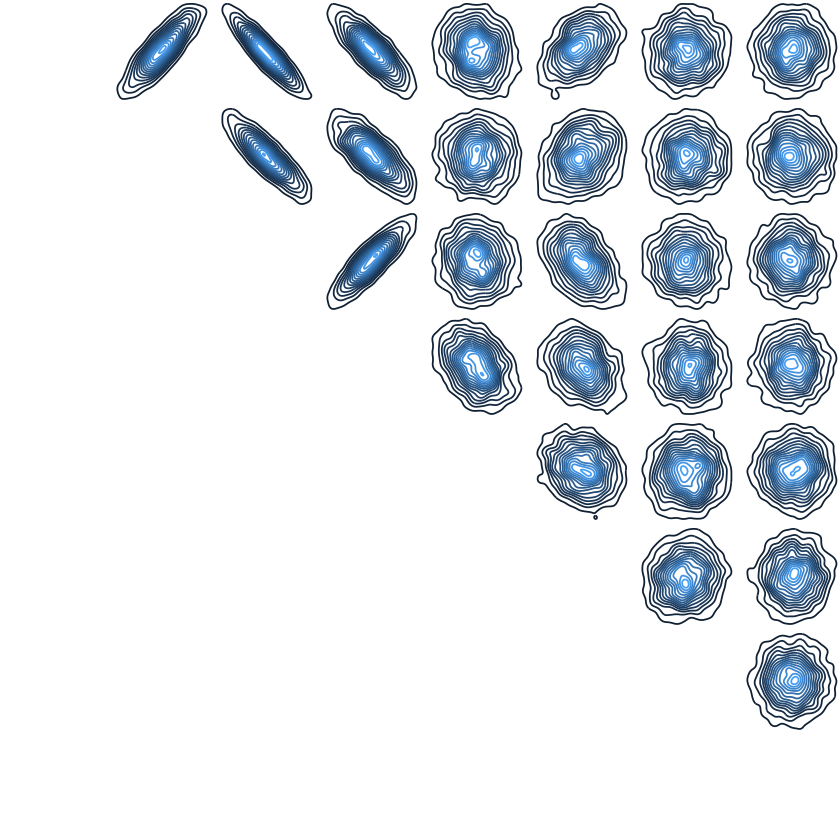

In [17]:
options(repr.plot.width = 7, repr.plot.height = 7)

final = ggdraw()

pad = 0.02

for (i in 1:(dimension-1)){
    for (j in (i+1):dimension){
        plotij = ggplot(laplace_samples_df_2, aes_string(x=colnames(samples_df)[i],y=colnames(samples_df)[j])) + 
                stat_density_2d(aes(colour = ..level..), show.legend=FALSE, bins=15) +  scale_fill_continuous(type = "viridis")+ theme_tufte() +  
                theme(axis.title.x=element_blank(),
                axis.title.y = element_blank(),
                axis.ticks.x=element_blank(),
                axis.text.y = element_blank(),
                axis.text.x = element_blank(),
                axis.ticks.y=element_blank()) + theme(plot.margin = margin(2, 2, -2, 2))
        final = final + draw_plot(plotij, x = (j-1)/dimension, y = 1 - i/dimension, width = 0.13, height = 0.13)
    }
    
}

final

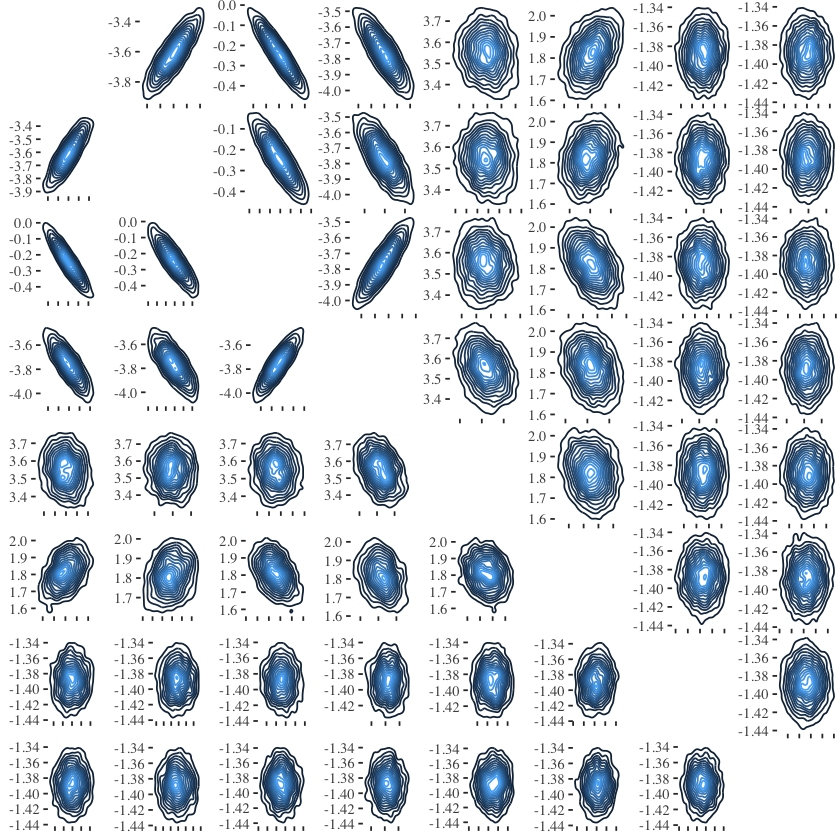

In [18]:
options(repr.plot.width = 7, repr.plot.height = 7)

final = ggdraw()

pad = 0.02

for (i in 1:(dimension -1)){
    for (j in (i+1):dimension){
        plotij = ggplot(samples_df, aes_string(x=colnames(samples_df)[i],y=colnames(samples_df)[j])) + 
                stat_density_2d(aes(colour = ..level..), show.legend=FALSE, bins=15) +  scale_fill_continuous(type = "viridis")+ theme_tufte() +  
                theme(axis.title.x=element_blank(),
                axis.title.y = element_blank(),
                # axis.ticks.x=element_blank(),
                # axis.ticks.y=element_blank()) 
                # axis.text.y = element_blank(),
                axis.text.x = element_blank()) +
                 theme(plot.margin = margin(2, 2, -2, 2))
        final = final + draw_plot(plotij, x = (j-1)/dimension, y = 1 - i/dimension, width = 1/dimension, height = 1/dimension)
    }
    
}

for (j in 1:(dimension -1)){
    for (i in (j+1):dimension){
        plotij = ggplot(laplace_samples_df, aes_string(x=colnames(laplace_samples_df)[j],y=colnames(laplace_samples_df)[i])) + 
                stat_density_2d(aes(colour=..level..), show.legend=FALSE, bins=15) +scale_fill_continuous(type = "viridis")+ theme_tufte() +   
                theme(axis.title.x=element_blank(),
                axis.title.y = element_blank(),
                # axis.ticks.x=element_blank(),
                # axis.ticks.y=element_blank()) 
                # axis.text.y = element_blank(),
                axis.text.x = element_blank())
        final = final + draw_plot(plotij, x = (j-1)/dimension, y = 1 - i/dimension , width = 1/dimension, height = 1/dimension)
    }   
}

final

## Posterior Predictive Check

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


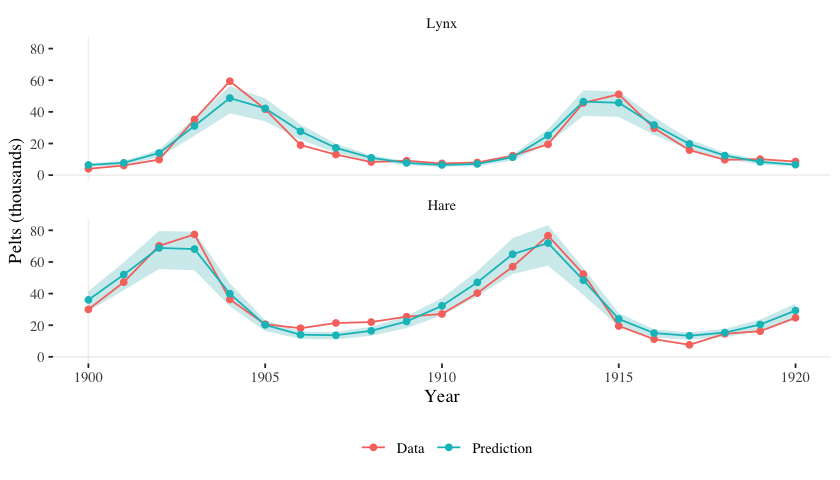

In [44]:
options(repr.plot.width = 7, repr.plot.height = 4)

z_init_draws <- extract(fit_final)$z_init
z_draws <- extract(fit_final)$z
y_init_rep_draws <- extract(fit_final)$y_init_rep
y_rep_draws <- extract(fit_final)$y_rep
predicted_pelts <- matrix(NA, 21, 2)
min_pelts <- matrix(NA, 21, 2)
max_pelts <- matrix(NA, 21, 2)
for (k in 1:2) {
  predicted_pelts[1, k] <- mean(y_init_rep_draws[ , k])
  min_pelts[1, k] <- quantile(y_init_rep_draws[ , k], 0.25)
  max_pelts[1, k] <- quantile(y_init_rep_draws[ , k], 0.75)
  for (n in 2:21) {
    predicted_pelts[n, k] <- mean(y_rep_draws[ , n - 1, k])
    min_pelts[n, k] <- quantile(y_rep_draws[ , n - 1, k], 0.25)
    max_pelts[n, k] <- quantile(y_rep_draws[ , n - 1, k], 0.75)
  }
}
lynx_hare_melted_df <- melt(as.matrix(lynx_hare_df[, 2:3]))
colnames(lynx_hare_melted_df) <- c("Year", "species", "pelts")
lynx_hare_melted_df$Year <-
  lynx_hare_melted_df$Year +
  rep(1899, length(lynx_hare_melted_df$Year))
Nmelt <- dim(lynx_hare_melted_df)[1]
lynx_hare_observe_df <- lynx_hare_melted_df
lynx_hare_observe_df$source <- rep("Data", Nmelt)
lynx_hare_predict_df <-
  data.frame(Year = rep(1900:1920, 2),
             species = c(rep("Lynx", 21), rep("Hare", 21)),
             pelts = c(predicted_pelts[, 2],
                       predicted_pelts[, 1]),
             min_pelts = c(min_pelts[, 2], min_pelts[, 1]),
             max_pelts = c(max_pelts[, 2], max_pelts[, 1]),
             source = rep("Prediction", 42))
lynx_hare_observe_df$min_pelts = lynx_hare_predict_df$min_pelts
lynx_hare_observe_df$max_pelts = lynx_hare_predict_df$max_pelts
lynx_hare_observe_predict_df <-
  rbind(lynx_hare_observe_df, lynx_hare_predict_df)
population_plot <-
  ggplot(data = lynx_hare_observe_predict_df,
         aes(x = Year, y = pelts, color = source)) +
  geom_vline(xintercept = 1900, color = "grey", alpha=0.2) +
  geom_hline(yintercept = 0, color = "grey", alpha=0.2) +
  facet_wrap( ~ species, ncol = 1) +
  geom_ribbon(aes(ymin = min_pelts, ymax = max_pelts),
	      colour = NA, fill = "#56bdc2", alpha = 0.3) +
  labs(color = "") +
  geom_line() +
  geom_point() +
  ylab("Pelts (thousands)") +
  theme_tufte() +
  theme(legend.position="bottom")
population_plot

In [45]:
ggsave('lv.pdf', plot = population_plot,  device = 'pdf', width = 6, height = 4)